In [1]:
import get_tcavs
%load_ext autoreload
%autoreload 2

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Tensor values in checkpoint
tensor_name:  beta1_power
0.0
tensor_name:  beta2_power
7.12157e-09
tensor_name:  fc1/bias
[0.13223186 0.0998423  0.11624288 0.09241972 0.1517978  0.14663665
 0.09406051 0.08973819 0.10393526 0.1497505  0.1074039  0.14339018
 0.12490103 0.16270679 0.09907752 0.11530218 0.14618596 0.0859062
 0.16591403 0.09875048 0.11949892 0.0974927  0.12089816 0.08538292
 0.09082573 0.14251846 0.13059199 0.1720874  0.07764579 0.16900292
 0.13425715 0.15828618 0.13966015 0.12603861 0.11078554 0.16810392
 0.07212854 0.15849958 0.07290126 0.1593508  0.15050463 0.1582703
 0.11163488 0.14703281 0.12208707 0.11186604 0.11701337 0.11656719
 0.13144802 0.16937459]
tensor_name:  fc1/bias/Adam
[-2.1336619e-03  5.6077522e-04 -5.8530010e-03 -5.7729770e-04
 -4.3977601e-03 -7.1299160e-03  9.0587810e-03  1.5443813e-02
  7.3604984e-03  9.3156192e-03  4.8943418e-03 -1.7930

INFO:tensorflow:Restoring parameters from models/mnist5.ckpt
Variables after loading checkpoint
[ 0.22080654  0.18326603  0.20179808  0.04154629  0.11257627  0.02757426
  0.05292156  0.05045803 -0.00525812  0.12098874  0.16533716  0.15861095
  0.1569      0.06051386  0.10730857  0.11064466  0.05287125  0.08930905
  0.11889639  0.17045197  0.11595083  0.15497619  0.16711022  0.1481324
  0.14096265  0.14987373  0.02179117  0.22450985  0.04619661  0.25069547
  0.10150782  0.04999921  0.11209098  0.04644955  0.15815236  0.15941456
  0.09386616  0.08120313  0.17961963  0.15860051  0.13978286  0.09647257
  0.19393365  0.12563974  0.08839697  0.08863489  0.21223155  0.03421076
  0.17692539  0.13365705]
INFO:tensorflow:Restoring parameters from models/mnist5.ckpt
Bottleneck tensors
{'fc1_truncated_normal': <tf.Tensor 'fc1/truncated_normal:0' shape=(50, 50) dtype=float32>, 'fc1_Add': <tf.Tensor 'fc1/Add:0' shape=(?, 50) dtype=float32>, 'fc1_Relu': <tf.Tensor 'fc1/Relu:0' shape=(?, 50) dtype=flo

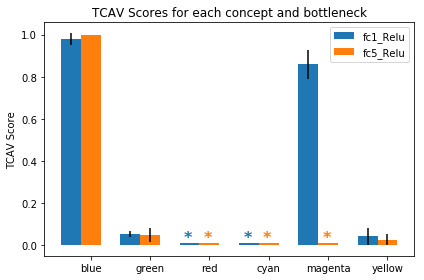

In [2]:
get_tcavs.main()